# Lab 4 (Solutions)

## Exercise 1

Recall our bisection algorithm:

In [1]:
def bisection(func, low, high, n_max):
    assert func(low)*func(high)<0
    for i in range(n_max):
        midpoint = (low + high) / 2.0
        if func(low)*func(midpoint)<0:
            high = midpoint
        else:
            low = midpoint
    return midpoint

Use the Bisection method to find $p_3$ for $f(x)=\sqrt{x}- \cos{x} = 0$ on $[0,1]$.

In [2]:
import numpy as np

f = lambda x: np.sqrt(x)-np.cos(x)
bisection(f,0,1,3)

0.625

Let $f(x)=(x+2)(x+1)x(x-1)^3(x-2)$. To which zero of $f$ does the Bisection method converge when applied on the following intervals?

- $[-3,2.5]$
- $[-2.5,3]$
- $[-1.75,1.5]$
- $[-1.5,1.75]$

In [3]:
f = lambda x: (x+2)*(x+1)*x*(x-1)**3*(x-2)

print('[-3, 2.5]: ',bisection(f,-3,2.5,100))
print('[-2.5, 3]: ',bisection(f,-2.5,3,100))
print('[-1.75, 1.5]: ',bisection(f,-1.75,1.5,100))
print('[-1.5, 1.75]: ',bisection(f,-1.5,1.75,100))

[-3, 2.5]:  2.0
[-2.5, 3]:  -2.0
[-1.75, 1.5]:  -0.9999999999999998
[-1.5, 1.75]:  1.0000000000000004


## Exercise 2

Consider the function 

$$ f(x) = \frac{1}{4} - \frac{\sin(4x)}{x}.$$

Use vertical lines to partition the graph so that each root is in its own section.  Hint:  Use `plt.vlines()`.  Also, `max()` and `min()` might be useful.

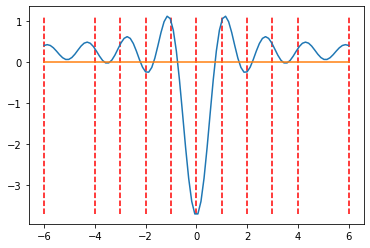

In [9]:
import numpy as np
from matplotlib import pyplot as plt

f = lambda x: 0.25 - np.sin(4*x)/x
g = lambda x: 0*x
x = np.linspace(-6,6,100)

plt.vlines(x=[-6,-4,-2,-3,-1,0,1,2,3,4,6], ymin=f(x).min(), ymax=f(x).max(),colors ='r',linestyles='dashed')
#for line in [-6,-4,-2,-3,-1,0,1,2,3,4,6]:
#    plt.plot([line,line],[f(x).min(),f(x).max()],'r--')

plt.plot(x, f(x))
plt.plot(x, g(x))
plt.show()
#homework problem he wants us to find better, smaller intervals

# Lab 5

## Exercise 1

One way to visualize fixed-point iteration is through a cobweb plot.  (see:  https://www.johndcook.com/blog/2020/01/19/cobweb-plots/) modify our fixed-point iteration code to draw the cobweb plot and use the new code to see the last two examples discussed in notes.  Hint:  `plt.plot([x1,x2],[y1,y2]` can be used to plot the line segment form $(x_1,y_1) \text{ to } (x_2,y_2)$

p_n		 g(p_n)
1.000000	 0.000000	
0.000000	 -3.000000	
-3.000000	 96.000000	
96.000000	 84953085.000000	
84953085.000000	 52085473681492913685918814044160.000000	


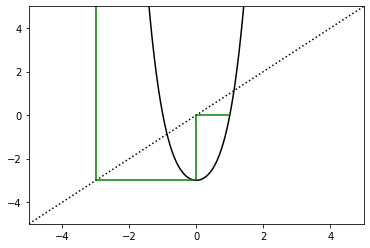

p_n		 g(p_n)
1.000000	 1.189207	
1.189207	 1.080058	
1.080058	 1.149671	
1.149671	 1.107821	
1.107821	 1.133932	
1.133932	 1.118003	
1.118003	 1.127857	
1.127857	 1.121813	
1.121813	 1.125540	
1.125540	 1.123249	


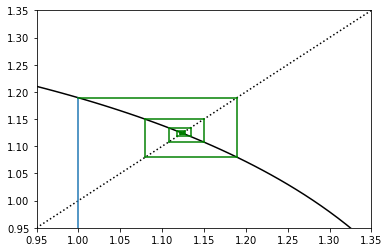

In [8]:
import numpy as np
from matplotlib import pyplot as plt

def print_heading(): 
    print('p_n\t\t', 
          'g(p_n)')
    
def print_row(p, fp): 
    print('%6f\t' % p, \
          '%6f\t' % fp)

def fixed_point_iteration_with_cobweb(func, p0, n_max, x_min, x_max):
    print_heading()     
    p = p0
    
    # plot function and y=x
    x=np.arange(x_min,x_max,0.01)
    plt.plot(x,x,'k:')
    plt.plot(x,func(x),'k')
    plt.plot([p0,p0],[0,func(p0)])
    
    for n in range(n_max):
        print_row(p, func(p))
        p_temp = p
        p = func(p)
        
        plt.plot([p_temp,p],[p,p], 'g')
        plt.plot([p,p], [p,func(p)], 'g')

        # plot cobweb 

        

    plt.axis([x_min,x_max,x_min,x_max])
    plt.show()
    return p

g1 = lambda x: x**4 + 2*x**2 - 3
root = fixed_point_iteration_with_cobweb(g1, p0=1, n_max=5, x_min=-5,x_max=5)

g2 = lambda x: (3 + x - 2*x**2)**0.25
root = fixed_point_iteration_with_cobweb(g2, p0=1, n_max=10,x_min=.95,x_max=1.35)



## Exercse 2

Consider the function 

$$ f(x) = \frac{1}{4} - \frac{\sin(4x)}{x}.$$

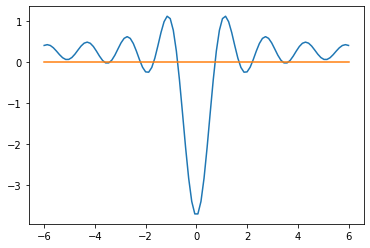

In [59]:
import numpy as np
from matplotlib import pyplot as plt

f = lambda x: 0.25 - np.sin(4*x)/x
g = lambda x: 0*x
x = np.linspace(-6,6,100)

plt.plot(x, f(x))
plt.plot(x, g(x))
plt.show()

Write a python function that generates two lists.  One for values just to the left of the roots and another for values just to the right of the roots for a given grid.  Hint:  Use the Intermediate Value Theorem.

In [10]:
import numpy as np

f = lambda x: 0.25 - np.sin(4*x)/x
grid = np.linspace(-6,6,100)

print(grid)

[-6.         -5.87878788 -5.75757576 -5.63636364 -5.51515152 -5.39393939
 -5.27272727 -5.15151515 -5.03030303 -4.90909091 -4.78787879 -4.66666667
 -4.54545455 -4.42424242 -4.3030303  -4.18181818 -4.06060606 -3.93939394
 -3.81818182 -3.6969697  -3.57575758 -3.45454545 -3.33333333 -3.21212121
 -3.09090909 -2.96969697 -2.84848485 -2.72727273 -2.60606061 -2.48484848
 -2.36363636 -2.24242424 -2.12121212 -2.         -1.87878788 -1.75757576
 -1.63636364 -1.51515152 -1.39393939 -1.27272727 -1.15151515 -1.03030303
 -0.90909091 -0.78787879 -0.66666667 -0.54545455 -0.42424242 -0.3030303
 -0.18181818 -0.06060606  0.06060606  0.18181818  0.3030303   0.42424242
  0.54545455  0.66666667  0.78787879  0.90909091  1.03030303  1.15151515
  1.27272727  1.39393939  1.51515152  1.63636364  1.75757576  1.87878788
  2.          2.12121212  2.24242424  2.36363636  2.48484848  2.60606061
  2.72727273  2.84848485  2.96969697  3.09090909  3.21212121  3.33333333
  3.45454545  3.57575758  3.6969697   3.81818182  3.

In [24]:
#for num in grid:
#    if f(num)*f(num) > 0
 #   print(num, f(num))
left_end = []
right_end = []
for i in range(len(grid)-1):
    if f(grid[i])*f(grid[i+1]) <0:
        #print(grid[i])
        left_end.append(grid[i])
    if f(grid[i])*f(grid[i-1]) <0:  
        right_end.append(grid[i])
    
    

In [25]:
print(left_end)
print(right_end)

[-3.696969696969697, -3.4545454545454546, -2.242424242424242, -1.7575757575757578, -0.7878787878787881, 0.666666666666667, 1.6363636363636367, 2.121212121212121, 3.333333333333334, 3.575757575757576]
[-3.5757575757575757, -3.333333333333333, -2.121212121212121, -1.6363636363636367, -0.6666666666666661, 0.7878787878787881, 1.7575757575757578, 2.242424242424242, 3.454545454545455, 3.6969696969696972]
